<h1>My analysis on youtube trending page</h1>
<p>I get this datasets from https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset. I did some analysis because i am curious to see what insight i well get from this datasets. This is also to train my EDA skill further.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
import MeCab

<h2>
US
</h2>

In [2]:
yt_us = pd.read_csv('datasets/US_youtube_trending_data.csv')
yt_us.head(2)
# yt_us.isna().any()
# yt_us.info()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."


<h3>First preprocess the data</h3>
<p>First i will plot categoryId to make a new category column. I can do that using json metadata files. Then, i will drop unrelated column and transform published date and created date into datetime datatype</p>

In [3]:
#First make the category of the video from json file
category = pd.read_json('datasets/US_category_id.json')
category = category['items']

#make a new dataframe that correspond to category on json files
genre_id= []
genre = []

for i in range(0, len(category)-1):
    genre_id.append(str(category[i]).split(", ")[2].split(': ')[-1].strip("'"))
    genre.append(str(category[i]).split(", ")[3].split(': ')[-1].strip("'"))

genre = pd.DataFrame(list(zip(genre_id, genre)), columns=['id', 'genre']).set_index('id')
yt_us['category'] = yt_us['categoryId'].apply(lambda x : genre.loc[str(x)]['genre']) 

#drop unrelated columns
yt_us.drop(['categoryId', 'channelId', 'video_id', 'thumbnail_link'], axis=1, inplace=True)

#Then let's change the published and trending date format
yt_us['publishedAt'] = pd.to_datetime(yt_us['publishedAt'], format='%Y-%m-%dT%H:%M:%S')
yt_us['trending_date'] = pd.to_datetime(yt_us['trending_date'], format='%Y-%m-%dT%H:%M:%S')

<h3>Analysis </h3>
<p>After preprocessing, i think would be interesting to plot the the stats based on the month the video created<p>

In [4]:
yt_us_trend = yt_us.groupby('trending_date').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_us_trend.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_us_trend['date'] = date

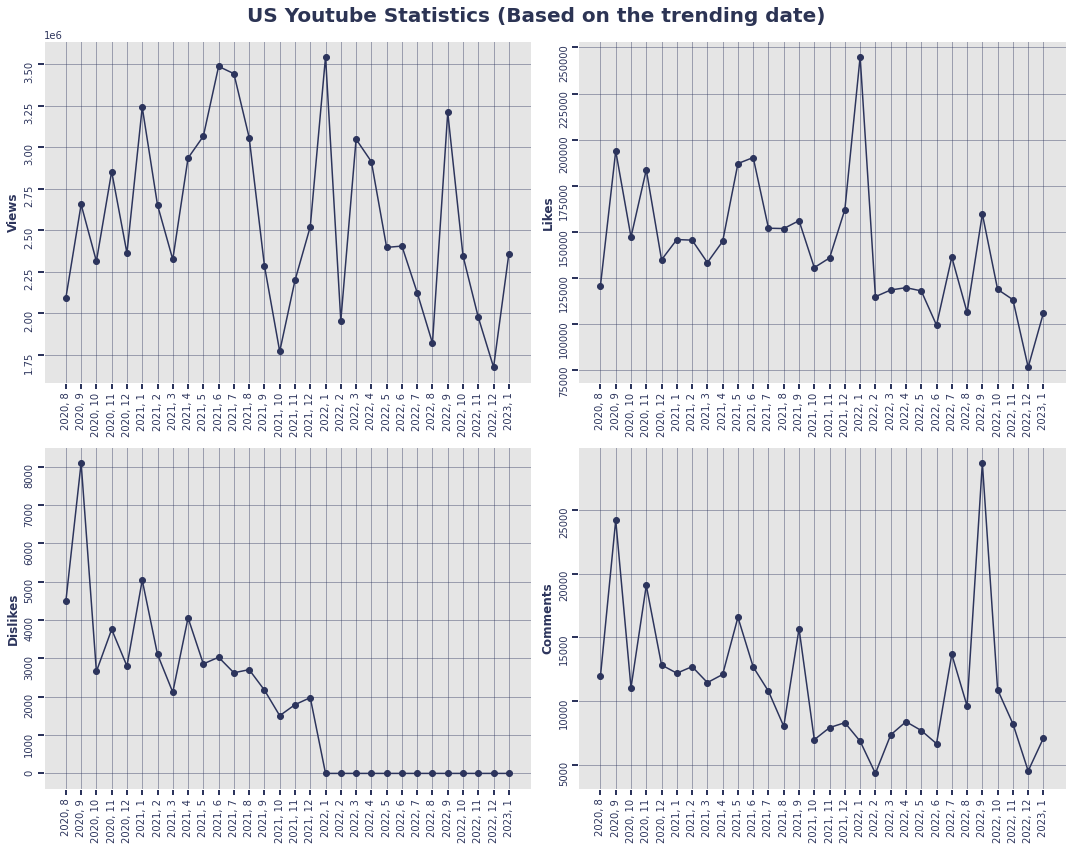

In [5]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_us_trend['date'], yt_us_trend['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_us_trend['date'], yt_us_trend['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_us_trend['date'], yt_us_trend['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_us_trend['date'], yt_us_trend['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("US Youtube Statistics (Based on the trending date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

- From the plot above, i think we can conclude that something happen on September, 2022. Rusia vs Ukraine probably?
- Something big happen on January, 2022. from 'likes' plot we can see that it is something people see really positives
- The 'dislike' plot tells there is a big horrible thing on September, 2020 and January, 2021.

In [6]:
yt_us_published = yt_us.groupby('publishedAt').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_us_published.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_us_published['date'] = date

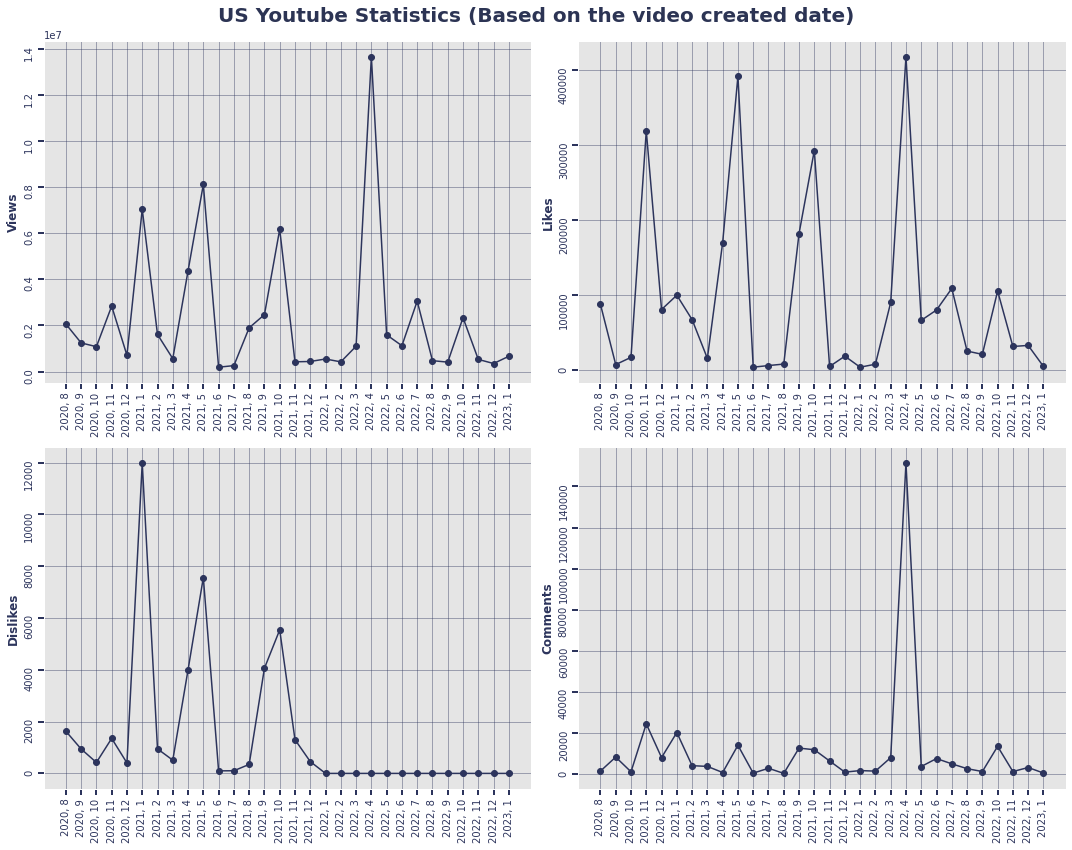

In [7]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_us_published['date'], yt_us_published['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_us_published['date'], yt_us_published['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_us_published['date'], yt_us_published['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_us_published['date'], yt_us_published['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("US Youtube Statistics (Based on the video created date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

- There are so much videos that goes trend on April, 2022. What major events that could make it happen? from the 'likes' plot we know that is positive
- The dislike plot tells me that something horrible happen at March, 2021

<p>Now analyze the correlation between likes, dislikes, and the views.<p>

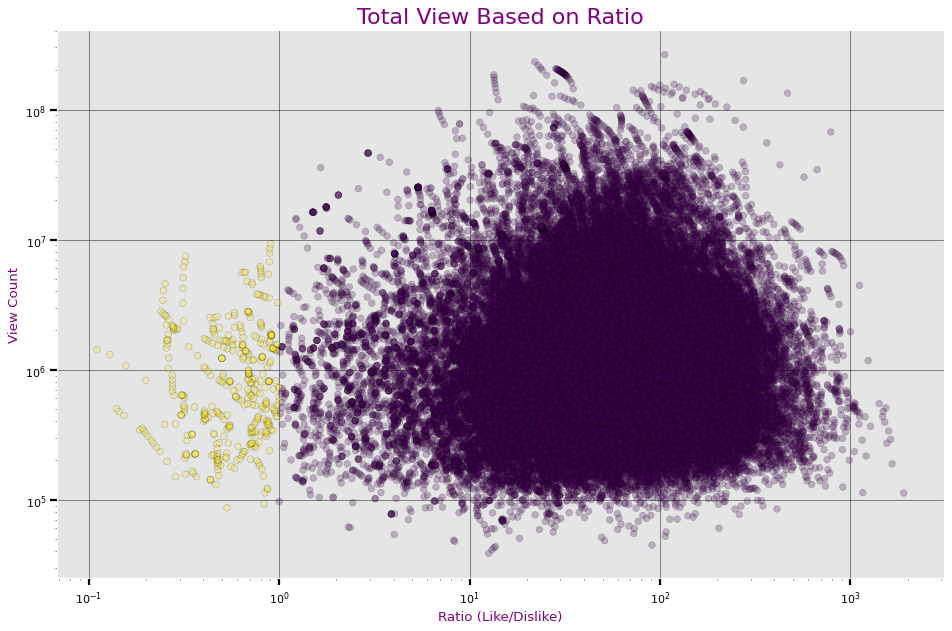

In [8]:
yt_us['ratio'] = yt_us['likes'] / yt_us['dislikes']

plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(yt_us['ratio'], yt_us['view_count'], c=yt_us['ratio'] < 1, alpha=.25, edgecolors='black')
plt.xscale("log") 
plt.yscale("log")
plt.xlabel('Ratio (Like/Dislike)', fontsize=12, color='purple')
plt.ylabel('View Count', fontsize=12, color='purple')
plt.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5)

plt.title('Total View Based on Ratio', fontsize=20, color='purple')
plt.tight_layout()
plt.show()

<p>I am curious about the stats of how long the video will get to the trending page</p>

In [9]:
yt_us['day_to_trend'] = (yt_us['trending_date'] - yt_us['publishedAt']).dt.days
yt_us['day_to_trend'].describe()

count    176390.000000
mean          2.994467
std           2.366001
min          -1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          36.000000
Name: day_to_trend, dtype: float64

<p>
So it takes one month at max to get to trending page. The average value is 3 days
</p>
<p>
I think i can get some insight if i do some analysis on data each year, I am curious to know what tags which popular each year on US
</p>

In [10]:
#Create a new df that spesifics to certain years
yt_us_2020 = yt_us[yt_us.trending_date.dt.year == 2020]
yt_us_2021 = yt_us[yt_us.trending_date.dt.year == 2021]
yt_us_2022 = yt_us[yt_us.trending_date.dt.year == 2022]

stopwords = stopwords.words("english")
stopwords.append('None')

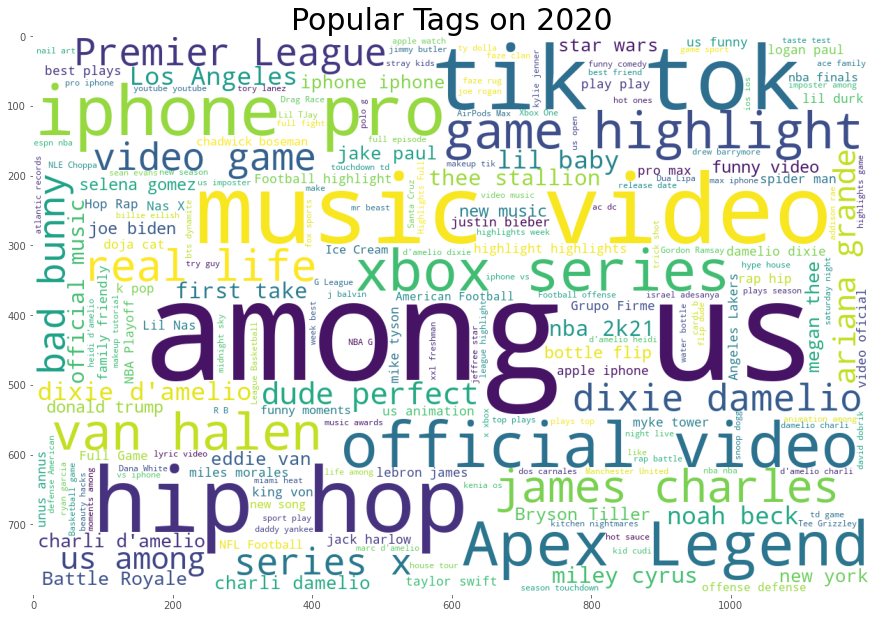

In [11]:
# yt_us_2020.head(2)
yt_us_2020_tags = []

for i in yt_us_2020['tags']:
    for j in str(i).split('|'):
        yt_us_2020_tags.append(j)
tags_2020 = " ".join([word for word in yt_us_2020_tags])

wc_2020 = WordCloud(background_color='white', height=800, width=1200, stopwords=stopwords).generate(tags_2020)
plt.title("Popular Tags on 2020", fontsize=30)
plt.grid(False)
plt.imshow(wc_2020)

<p>Among us lol</p>

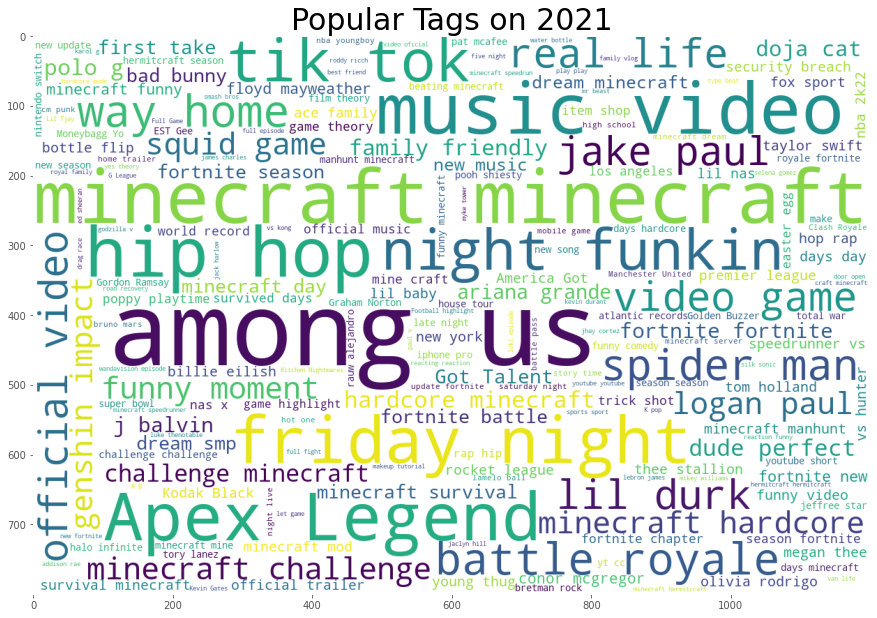

In [12]:
# yt_us_2021.head(2)
yt_us_2021_tags = []

for i in yt_us_2021['tags']:
    for j in str(i).split('|'):
        yt_us_2021_tags.append(j)
tags_2021 = " ".join([word for word in yt_us_2021_tags])

wc_2021 = WordCloud(background_color='white', height=800, width=1200, stopwords=stopwords).generate(tags_2021)
plt.title("Popular Tags on 2021", fontsize=30)
plt.grid(False)
plt.imshow(wc_2021)

<p>OMG</p>

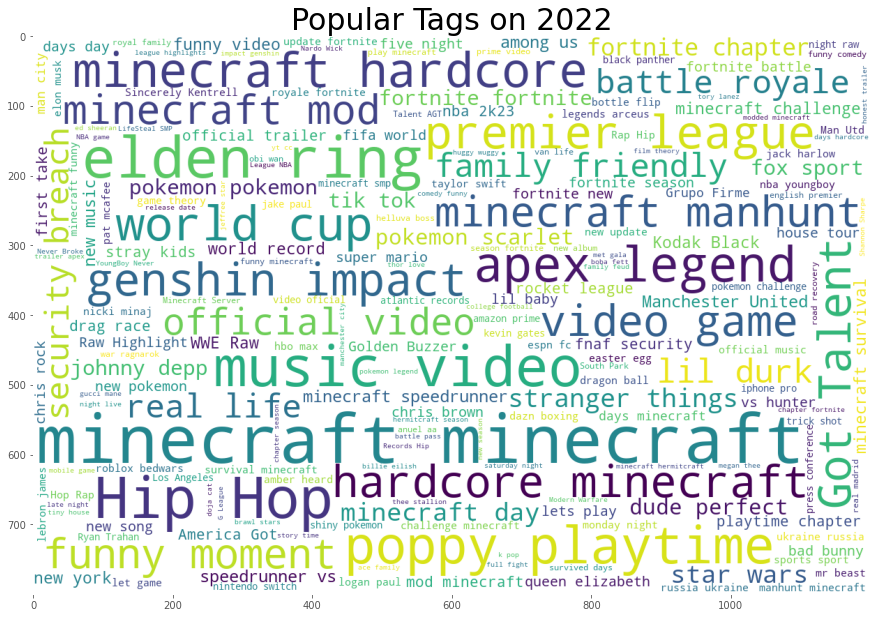

In [13]:
# yt_us_2022.head(2)
yt_us_2022_tags = []

for i in yt_us_2022['tags']:
    for j in str(i).split('|'):
        yt_us_2022_tags.append(j)
tags_2022 = " ".join([word for word in yt_us_2022_tags])

wc_2022 = WordCloud(background_color='white', height=800, width=1200, stopwords=stopwords).generate(tags_2022)
plt.title("Popular Tags on 2022", fontsize=30)
plt.grid(False)
plt.imshow(wc_2022)

<p>Gotta say, minecraft still the GOAT, now move on to categories</p>

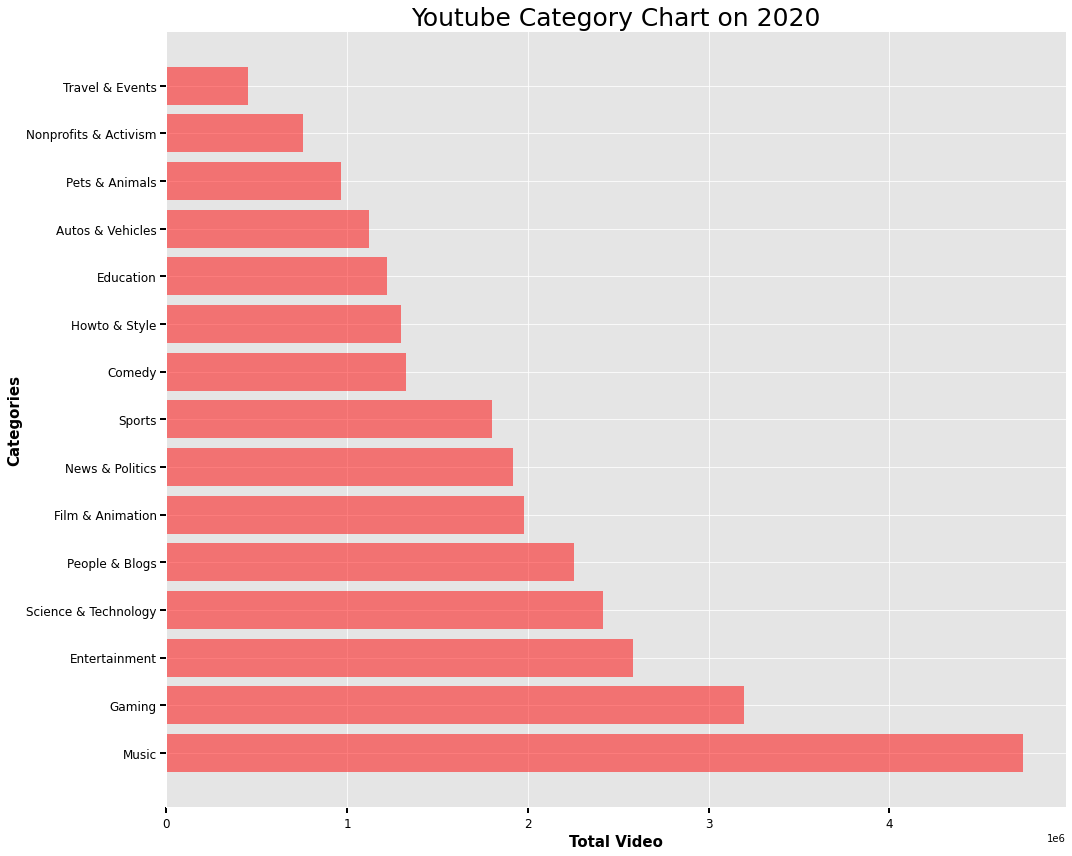

In [14]:
yt_us_2020_category = yt_us_2020.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_us_2020_category.index, yt_us_2020_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2020', fontsize=25)

plt.tight_layout()
plt.show()

<p>
music and gaming seems like became the most searched category on 2020
</p>

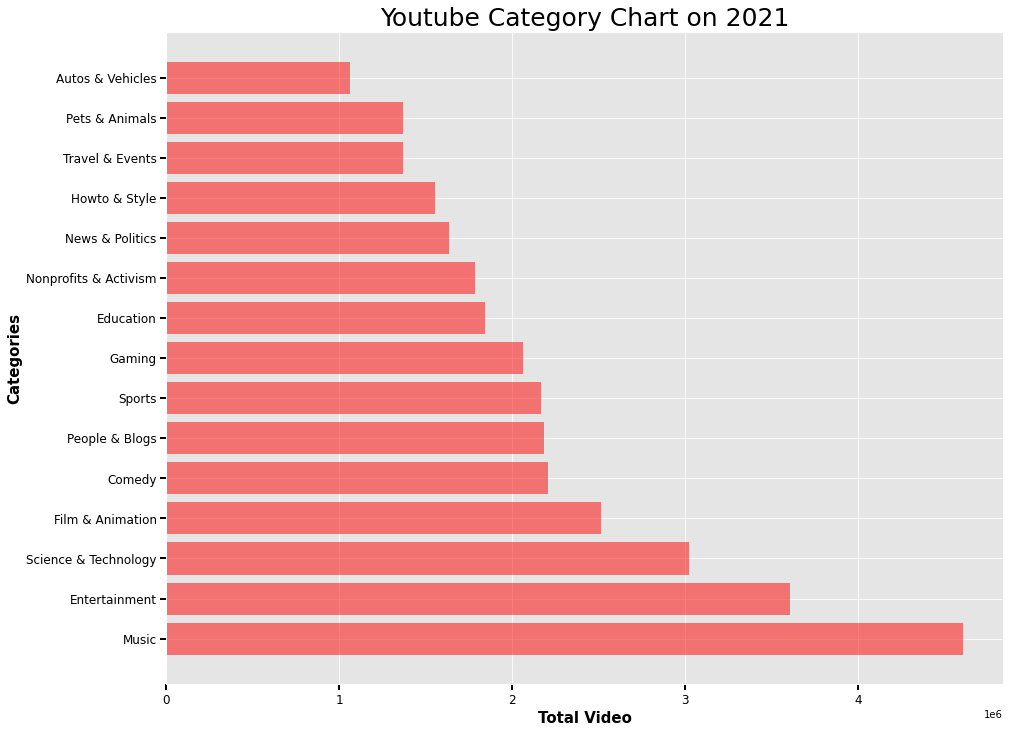

In [15]:
yt_us_2021_category = yt_us_2021.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_us_2021_category.index, yt_us_2021_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2021', fontsize=25)

plt.show()

<p>
Gaming categories seems fell off to Entertainment on 2021, but music still hold it's place
</p>

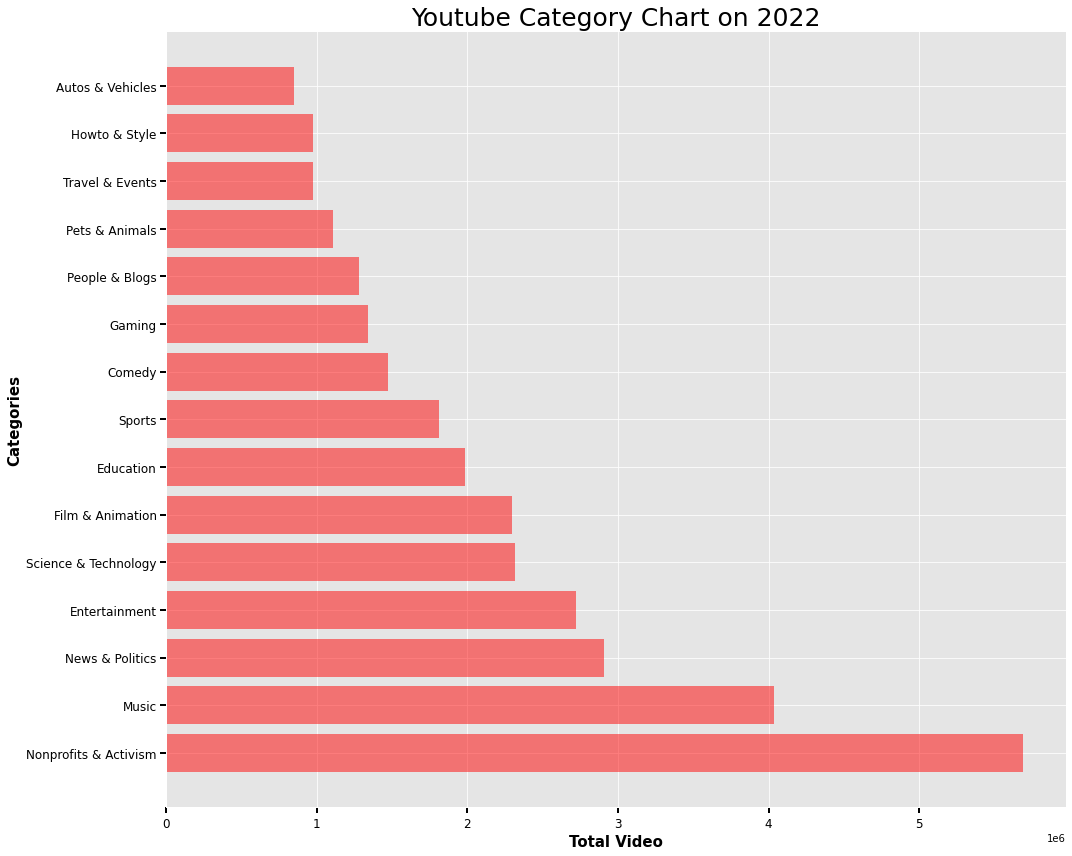

In [16]:
yt_us_2022_category = yt_us_2022.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_us_2022_category.index, yt_us_2022_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2022', fontsize=25)

plt.tight_layout()
plt.show()

<p>Wow, nonprofits and activism actually the category that people watched the most. I am shocked.</p>
<p>Well, it's not really suprising tho, there is a lot of big thing happened on 2022</p>